In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

**Generic note**: in this whole lab and from now, unless explicitly asked, you are not required to implement yourself the algorithms that you use. You may instead use existing implementations from e.g. scikit-learn.

In general, when you use implementations of algorithms that are not your own (which will be the case 99% of the time in real life), it is a good idea to check the documentation of the libraries you use to make sure you are not missing something important. As such, you are strongly encouraged to do so in this lab.

**Note bis**: in this lab, some questions may be (deliberately) ambiguous, or there may be multiple acceptable solutions (but also some unacceptable ones). So do not panic if you do not have exactly the same result as your neighbor, or as the future solution.

The goal is to make you learn by forcing you to think about what is happening and what should be done in different situations. However, so goal is **not** to punish you by giving you a bad grade because of some trick questions. So once again, **do not hesitate to ask questions**, and do not hesitate to ask an instructor whether your solution seems correct during lab sessions.

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [3]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("dataset.npy")

In [4]:
# Extract features and targets
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of feature matrix: (300, 2)


# Data preparation

We are going to do classification with different models, that will require selecting some hyper-parameter(s).

**In general, how should the dataset be split in this case?**

**For now, split the dataset into one training, one validation and one testing sets.** You can use the sklearn.model_selection.train_test_split function (but you don't have to).

We shall use the name X_train, X_val and X_test (respectively y_train, y_val and y_test) to refer to the samples (respectively labels) of these sets.

It is generally a good idea to have a look at the data whenever possible.

**Display the training dataset using a scatterplot**

*We should display colors for classes (or any other way to differentiate them such as shapes), otherwise we are not learning much.*

# (Linear) model training

## Basic model training

**Train a first <ins>linear</ins>, <ins>classification</ins> model.** Do **not** use regularization for now.

You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn). Don't evaluate the performance of the model for now, just train it.

**Are you *certain* your model does not have regularization?**

**What is the score of the model?**

(by "score", we mean "accuracy" here, i.e. the fraction of correct predictions).

**What if, instead of directly doing binary classification, we wanted to have some estimation of how confident the model is?**

Or, how could we obtain probabilities between 0 and 1 instead of binary predictions? (**Hint**: look at the doc of the model you used).

**Don't answer the question with words, directly provide the corresponding probability estimates.**

**Assuming we only had these probabilities, could we still make binary predictions?**

## Visualization of predictions

Now, let's visualize our probability estimates. Scikit-learn provides a useful tool for this: DecisionBoundaryDisplay.

The exact way it works is not that important, but the general is: we use our model to predict a probability for every pixel in the area of interest, based on its coordinates (which are its 2D features), and we display a color  corresponding to the estimated probability.

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

I will retrain a logistic regression for the purpose of illustrating this. This may not be the exact solution to the previous questions.

In [10]:
# Train a logistic regression
logreg = LogisticRegression() # (hyper)-parameters may differ from previous question
logreg.fit(X_train, y_train)

LogisticRegression()

And now we display the probabilities:

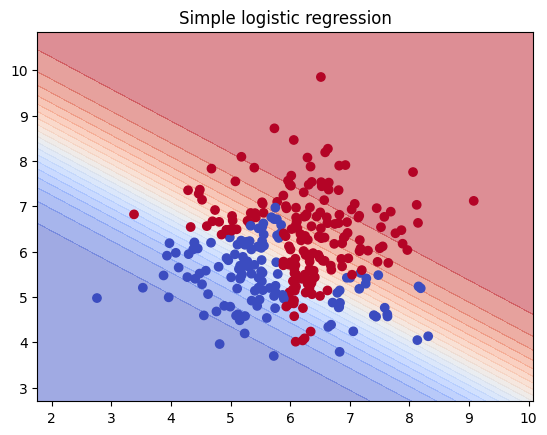

In [11]:
# Use DecisionBoundaryDisplay to display a heatmap corresponding to the estimated probabilities
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
# Add the training points on top using a scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Simple logistic regression")
plt.show()

**Does this look like a good fit?**

**Could we adapt our logistic regression model to have non-linear decision boundaries? How?**

## Non-linear logistic regression

**Train a logistic regression model using polynomial features. Are there any hyper-parameter? If yes, use a <ins>rigorous</ins> selection process to select an appropriate value.**

You can ignore regularization for now.

**If you were to proudly announce the performance of your model to the public, what is the value that you would you disclose?**

Now, we may want to also visualize the decision boundaries of our model with polynomial features.

Unfortunately, giving a matrix X_train_poly (for instance) of shape (100, 10) (for instance) to DecisionBoundaryDisplay.from_estimator will result in an error, as DecisionBoundaryDisplay only knows how to handle pixels in 2D, not in 10D.

Fortunately, we can combine a series of transformation on X_train as a single estimator using scikit-learn's Pipeline. We can also introduce other preprocessing (or even postprocessing) steps in the process, such as feature standardization.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [13]:
# Create a pipeline that first standardizes the data,
# then transforms it with PolynomialFeatures
# and finally fits LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize features
    ('poly', PolynomialFeatures(degree=2)), # for instance
    ('logreg', LogisticRegression(max_iter=500)) # for instance
])

Now we can directly call "fit" on this pipeline to train the model, and give this pipeline to DecisionBoundaryDisplay so that for each pixel, it can:
- compute the corresponding polynomial features from the initial 2D coordinates
- give these features to our logistic regression

and then display the heatmap of estimated probabilities as previously.

In [14]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg', LogisticRegression(max_iter=500))])

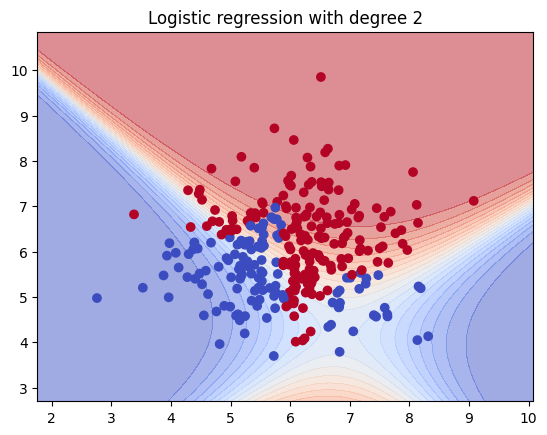

In [15]:
# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 2")
plt.show()

**Do the features <ins>used</ins> by the model have zero mean and unit standard deviation with our current pipeline? If not, what should be changed so that this is the case?**

**Now plot the probability heatmap of *your* model from earlier**

**Any observation?**

## Regularization and k-fold cross-validation

Our estimation of the best hyper-parameter may not be super robust, because we do not have many validation samples. So the size of our validation set is limited.

To overcome this, we will use **k-fold cross-validation.**

You do not need to implement it yourself. We will use scikit-learn's GridSearchCV from sklearn.model_selection instead, that enables to do k-fold to try different values of hyper-parameters.
 
As usual, do not hesitate to have a look at scikit-learn's documentation on this.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Defining a pipeline
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

Assuming we want to do test different possible values for the *"include_bias"* (hyper)parameter of PolynomialFeatures, and different values for *"penalty"* in LogisticRegression, we can specify the values to try as such:

In [18]:
# Defining the set of hyperparameters
hyperparameters = {
    'poly__include_bias': [True, False],
    'logreg__fit_intercept': [True, False]
}

And then, we can run k-fold to find the best combination of hyper-parameters like so:

In [19]:
# Running grid search
gridsearch = GridSearchCV(clf_pipeline, hyperparameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('logreg',
                                        LogisticRegression(max_iter=500,
                                                           solver='liblinear'))]),
             param_grid={'logreg__fit_intercept': [True, False],
                         'poly__include_bias': [True, False]})

The average score of the k-fold cross-validation for each set of hyper-parameter can be accessed as such:

In [20]:
gridsearch.cv_results_["mean_test_score"]

array([0.79333333, 0.79333333, 0.79333333, 0.72333333])

We could look at the hyper-parameters used for each run of k-fold to determine to best set of hyper-parameters. Scikit-learn also conviently provides a function/attribute that directly returns the best estimator:

In [21]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(max_iter=500, solver='liblinear'))])

**How many <ins>total</ins> model trainings took place here?**

Since we are now doing k-fold cross-validation, we can merge our training set and our validation set into a single dataset, which be split again during k-fold.

**Merge the training and validation set**

You may call the resulting matrices and vectors X_fold and y_fold

**Find the best combination of polynomial degree and regularization using k-fold cross-validation, with $k=10$**

**Plot the corresponding probability heatmap**

**What is the final accuracy of your model?**

Now we are starting to have good methodology!

Even though accuracy may not always be best way to measure performance, but we will cover that in later classes.

# Exploration of other algorithms

Now, we will use the heatmap displays to build some intuition about what happens with other classification algorithms.

## K-Nearest Neighbors

**Can we obtain probabilities with K-NN?**

For this question, "probability" may be interpreted as "a measure of confidence more precise than a yes/no answer".

**Fit K-NN on the training dataset with K ranging for 1 to 6, and plot the confidence heatmap.**

**Briefly explain what's happening**

## Naive Bayes

**Choose a suitable Naive Bayes classifier, and do same thing**

**Are there any hyper-parameter?**

***Bonus question: explain what is going on your plot.***

## Decision tree

**Can we obtain probabilities with decision trees?**

**Are there hyper-parameters with decision trees?**

**Similarly to K-NN earlier, fit decision trees with a max depth ranging for 1 to 10 on the training dataset, and plot the confidence heatmap.**

**Briefly explain what's happening**

***Bonus question: what is the max depth that may be reached on this train set?***

This question may be slightly harder.

## SVM

**Can we obtain "probabilities" with SVM?**

**Fit a <ins>single</ins> linear Support Vector Classifier on the training set, and display the heatmap**

**Now, compute polynomial features of any degree, e.g. 3, and fit a <ins>linear</ins> SVC on these new features. Display the heatmap.**

Fitting the model may take some time.

**Fit a SVC on the initial 2D features, this time using a polynomial kernel of degree e.g. 3. Display the heatmap.**

**Notice anything?**

**Now fit SVCs with polynomial kernel of degree 1 to 5, and plot the heatmaps.**

**Briefly describe what is happening.**

**Finally, use an RBF kernel. This time, use a good protocol to obtain reasonably good performance with RBF kernel.**